In [1]:
# Name Dipika Sharma
# DSC 540 T302 Data Preparation
# Week 11 and 12
# Project Milestone 5

In [31]:
# Declaring all the libraries I want to use now.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [ ]:
import sqlite3, pandas , matplotlib.pyplot as plt

## Creating sqlite table for storing IRS data for California State

In [41]:
# Reading the csv file.

IRS_CA_df=pd.read_csv("IRS_CA_df.csv")

In [166]:
 # Most of the columns in selected dataset has name which do not make sense, so I am showing the defintion of some of the columns that i want to use in my database.
 
 # STATEFIPS - The State Federal Information Processing System (FIPS) code
 # STATE - The State associated with the ZIP code
 # ZIPCODE - 5-digit Zip code
 # AGI_STUB - Size of adjusted gross income
 # N1 - Number of returns [3]
 # A00100 - Adjust gross income (AGI) [8]
 # N02650 - Number of returns with total income
 # A02650 - Total income amount
 # N00200 - Number of returns with salaries and wages
 # A00200 - Salaries and wages amount

In [42]:
# Lets check the top 5 rows of the dataset.
IRS_CA_df.head()

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,No_of_Returns,AGI,Returns__Tot_Income,Tot_Income,Returns_Sal_Wages,Sal_Wages_Amt
0,6,CA,90001,3,23030.0,746113.0,23020.0,7.516150e+05,19850.0,670115.0
1,6,CA,90002,3,21420.0,688469.0,21420.0,6.940560e+05,18610.0,621179.0
2,6,CA,90003,4,29480.0,890398.0,29480.0,8.981900e+05,25130.0,797011.0
3,6,CA,90004,6,28160.0,2254004.0,28160.0,2.290432e+06,22970.0,1486573.0
4,6,CA,90005,4,16870.0,984929.0,16870.0,9.986870e+05,14090.0,711721.0


In [43]:
# Using shape function to see the total number of columns and rows.
IRS_CA_df.shape

(1477, 10)

In [44]:
# Create a database connection and cursor to execute queries.
conn = sqlite3.connect('Project.db')
c = conn.cursor()

In [ ]:
# creating table to store IRS data for California state
c.execute('''CREATE TABLE IRS_CA_df (STATEFIPS int, STATE text, ZIPCODE text, AGI_STUB int, No_of_Returns float, AGI float, Returns__Tot_Income float, Tot_Income float, Returns_Sal_Wages float, Sal_Wages_Amt float)''')


In [47]:
# write the IRS data to a sqlite table 
IRS_CA_df.to_sql('IRS_CA_df', conn, if_exists='append', index = False)

In [167]:
# This section of code is created to test whether data loaded in sqlite table or not.
# Run select sql query
c.execute('select * from IRS_CA_df')
 
# Fetch all records
# as list of tuples
records = c.fetchall()
 
# Display result 
#for row in records:
    # show row
 #   print(row)

## Creating sqlite table for storing covid vaccination data for California State

In [5]:
# Reading the CSV data for covid vaccination
Covid_df=pd.read_csv("Covid_df.csv")

In [6]:
# lets see the top 5 rows of dataset.
Covid_df.head()

,id,as_of_date,zip_code_tabulation_area,local_health_jurisdiction,county,vaccine_equity_metric_quartile,vem_source,age12_plus_population,persons_fully_vaccinated,persons_partially_vaccinated,percent_of_population_fully_vaccinated,percent_of_population_partially_vaccinated,percent_of_population_with_1_plus_dose,redacted
0,1,2021-01-05,91902,San Diego,San Diego,4.0,Healthy Places Index Score,16620.7,22.0,372.0,0.001324,0.022382,0.023706,No
1,2,2021-01-05,92410,San Bernardino,San Bernardino,1.0,Healthy Places Index Score,35012.3,0.0,0.0,0.000000,0.000000,0.000000,Information redacted in accordance with CA sta...
2,3,2021-01-05,92285,San Bernardino,San Bernardino,1.0,Healthy Places Index Score,2317.1,0.0,0.0,0.000000,0.000000,0.000000,Information redacted in accordance with CA sta...
3,4,2021-01-05,95621,Sacramento,Sacramento,2.0,Healthy Places Index Score,36059.1,12.0,412.0,0.000333,0.011426,0.011759,No
4,5,2021-01-05,92656,Orange,Orange,4.0,Healthy Places Index Score,43721.9,0.0,0.0,0.000000,0.000000,0.000000,Information redacted in accordance with CA sta...


In [53]:
# creating sqlite table for storing covid vaccination data.
c.execute('''CREATE TABLE Covid_df (id int,  as_of_date date, zip_code_tabulation_area int, local_health_jurisdiction text, county text, vaccine_equity_metric_quartile float, vem_source text, age12_plus_population float, persons_fully_vaccinated float, persons_partially_vaccinated float, percent_of_population_fully_vaccinated float, percent_of_population_partially_vaccinated float, percent_of_population_with_1_plus_dose float, redacted text)''')

In [54]:
# write the covid vaccination data to a sqlite table
Covid_df.to_sql('Covid_df', conn, if_exists='append', index = False)

In [55]:
# This code is to test the sqlite table data
# Run select sql query
c.execute('select count(*) as cnt from Covid_df')
 
# Fetch all records
# as list of tuples
records = c.fetchall()
 
# Display result 
for row in records:
    # show row
    print(row)

(77616,)


## Creating sqlite table for storing postal code data for california state

In [7]:
# Reading postal code csv file

postal_code=pd.read_csv("postal_code_df.csv")

In [8]:
# Lets check the top 5 rows of the dataset.
postal_code.head()

,Place,Code,Country,State,City
0,Beverly Hills,90210,United States,California,Los Angeles
1,Los Angeles,90002,United States,California,Los Angeles
2,Los Angeles,90003,United States,California,Los Angeles
3,Los Angeles,90004,United States,California,Los Angeles
4,Los Angeles,90006,United States,California,Los Angeles


In [10]:
# Using shape function to check the total number of rows and columns in a dataset.
postal_code.shape

(200, 5)

In [50]:
# creating sqlite table for storing postal code data for california state.
c.execute('''CREATE TABLE postal_code (Place text, Code int, Country text, State text, City text)''')

In [51]:
# write the postal code data to a sqlite table
postal_code.to_sql('postal_code', conn, if_exists='append', index = False)

In [52]:
# This code is only to test the sqlite table, if data loaded or not.
# Run select sql query
c.execute('select count(*) as cnt from postal_code')
 
# Fetch all records
# as list of tuples
records = c.fetchall()
 
# Display result 
for row in records:
    # show row
    print(row)

(200,)


In [61]:
# installing plotty
pip install plotly

Note: you may need to restart the kernel to use updated packages.


## Creating sqlite table for storing the covid cases data for California State

In [100]:
# Reading the csv file.

Covid_cases=pd.read_csv("COVID-19_Community_Profile_Report_-_County-Level.csv")

In [101]:
# using the shape function to see the total number of columns and rows in a dataset.
Covid_cases.shape

(3294, 39)

In [102]:
# Selecting only CA state.
Covid_cases = Covid_cases[(Covid_cases['state']=='CA')]

In [103]:
# To chek number of rows and columns
Covid_cases.shape

(59, 39)

In [104]:
# To check all the column names.
Covid_cases.columns

Index(['fips', 'county', 'state', 'fema_region', 'date', 'cases_last_7_days',
       'cases_per_100k_last_7_days', 'total_cases',
       'cases_pct_change_from_prev_week', 'deaths_last_7_days',
       'deaths_per_100k_last_7_days', 'total_deaths',
       'deaths_pct_change_from_prev_week', 'test_positivity_rate_last_7_days',
       'total_positive_tests_last_7_days', 'total_tests_last_7_days',
       'total_tests_per_100k_last_7_days',
       'test_positivity_rate_pct_change_from_prev_week',
       'total_tests_pct_change_from_prev_week',
       'confirmed_covid_hosp_last_7_days',
       'confirmed_covid_hosp_per_100_beds_last_7_days',
       'confirmed_covid_hosp_per_100_beds_pct_change_from_prev_week',
       'suspected_covid_hosp_last_7_days',
       'suspected_covid_hosp_per_100_beds_last_7_days',
       'suspected_covid_hosp_per_100_beds_pct_change_from_prev_week',
       'pct_inpatient_beds_used_avg_last_7_days',
       'pct_inpatient_beds_used_abs_change_from_prev_week',
       

#### As we can see the above covid cases dataset has so many columns and i am not planning to use all of them for my data analysis. so lets clean the dataset by creating the dataset with only selected columns

In [105]:
# This new dataset will look more clean and it would be easy for me to read the data.

Covid_cases = Covid_cases.filter(['fips', 'county', 'state', 'fema_region', 'date', 'cases_last_7_days', 'total_cases', 'deaths_last_7_days', 'total_deaths', 'total_tests_last_7_days', 'confirmed_covid_hosp_last_7_days', 'pct_fully_vacc_total_pop', 'pct_fully_vacc_65_and_older'], axis=1)

In [106]:
# Replacing the Nan values with 0.
Covid19_cases = Covid_cases.replace(np.nan, 0)

In [107]:
# Lets check the top 5 rows.
Covid19_cases.head()

,fips,county,state,fema_region,date,cases_last_7_days,total_cases,deaths_last_7_days,total_deaths,total_tests_last_7_days,confirmed_covid_hosp_last_7_days,pct_fully_vacc_total_pop,pct_fully_vacc_65_and_older
190,6000,"Unallocated, CA",CA,9.0,05/30/2022 12:00:00 AM,9.0,3717.0,0.0,0.0,18340.0,0.000,0.000,0.000
191,6001,"Alameda County, CA",CA,9.0,05/30/2022 12:00:00 AM,5878.0,296476.0,5.0,1863.0,68776.0,175.129,0.826,0.946
192,6003,"Alpine County, CA",CA,9.0,05/30/2022 12:00:00 AM,0.0,127.0,0.0,0.0,0.0,0.041,0.000,0.000
193,6005,"Amador County, CA",CA,9.0,05/30/2022 12:00:00 AM,71.0,9374.0,0.0,86.0,0.0,3.001,0.538,0.815
194,6007,"Butte County, CA",CA,9.0,05/30/2022 12:00:00 AM,311.0,40813.0,0.0,426.0,2390.0,11.918,0.541,0.792


In [108]:
# The county columns has "county, CA" phrase everywhere in data. Lets remove them to make more sense.
# Also I will be using this columns for joining so it will be good to remove extra text and commas from the data.

Covid19_cases["county"] = Covid19_cases["county"].str.replace(" County, CA","")

In [109]:
# Lets again check the top 5 rows of the dataset.
Covid19_cases.head()

,fips,county,state,fema_region,date,cases_last_7_days,total_cases,deaths_last_7_days,total_deaths,total_tests_last_7_days,confirmed_covid_hosp_last_7_days,pct_fully_vacc_total_pop,pct_fully_vacc_65_and_older
190,6000,"Unallocated, CA",CA,9.0,05/30/2022 12:00:00 AM,9.0,3717.0,0.0,0.0,18340.0,0.000,0.000,0.000
191,6001,Alameda,CA,9.0,05/30/2022 12:00:00 AM,5878.0,296476.0,5.0,1863.0,68776.0,175.129,0.826,0.946
192,6003,Alpine,CA,9.0,05/30/2022 12:00:00 AM,0.0,127.0,0.0,0.0,0.0,0.041,0.000,0.000
193,6005,Amador,CA,9.0,05/30/2022 12:00:00 AM,71.0,9374.0,0.0,86.0,0.0,3.001,0.538,0.815
194,6007,Butte,CA,9.0,05/30/2022 12:00:00 AM,311.0,40813.0,0.0,426.0,2390.0,11.918,0.541,0.792


In [91]:
# creating sqlite table for storing covid cases data for California state.
c.execute('''CREATE TABLE Covid19_cases (fips int, county text, state text, fema_region int, date date, cases_last_7_days float, 'total_cases' float, 'deaths_last_7_days' float, 'total_deaths' float, 'total_tests_last_7_days' float, 'confirmed_covid_hosp_last_7_days' float, 'pct_fully_vacc_total_pop' float, 'pct_fully_vacc_65_and_older' float)''')


In [110]:
# write the covid cases data to a sqlite table
Covid19_cases.to_sql('Covid19_cases', conn, if_exists='append', index = False)

In [111]:
# this code is to test the sqlite table content.
# Run select sql query
c.execute('select count(*) as cnt from Covid19_cases')
 
# Fetch all records
# as list of tuples
records = c.fetchall()
 
# Display result 
for row in records:
    # show row
    print(row)

(118,)


# 1. Vaccination in CA state

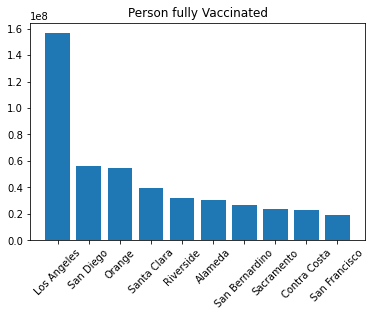

In [168]:
# storing the select query in sql variable.
sql = """SELECT sum(persons_fully_vaccinated) as cnt, local_health_jurisdiction FROM Covid_df GROUP BY local_health_jurisdiction order by cnt desc limit 10"""

# Read the data for above query.
data = pd.read_sql(sql, conn)
plt.xticks(rotation=45)
# Using the bar graph to see vaccination by jurisdiction
plt.bar(data.local_health_jurisdiction, data.cnt)
plt.title("Person fully Vaccinated")
plt.show()

### For above visualization we can see that Los Angeles is the city where most of the people are fully vaccinated. Please not I am showing only top 10 rows of the dataset.

### This visualization will show the total vaccination by jurisdiction. We can see How many total vaccines have been used in California state by jurisdiction. Looking at the above grapg we can say that Los Angeles has most vaccines followed by San Diego, Orange, Santa clara and go on.

In [172]:
# Using the loop to count the total number of vaccine of california state by Jurisdiction.
vaccine_total = {}
for local_health_jurisdiction in Covid_df.local_health_jurisdiction.unique() : # look for unique jurisdiction value
    vaccinated = 0
    for i in range(len(Covid_df)) : 
        if Covid_df.local_health_jurisdiction[i] == local_health_jurisdiction : 
            vaccinated += Covid_df.persons_fully_vaccinated[i]
    vaccine_total[local_health_jurisdiction] = vaccinated 
#     made a seperate dict from the df 
    vaccine_total_df = pd.DataFrame.from_dict(vaccine_total,
                                                         orient='index',
                                                         columns = ['vaccine_total'])
#     converted dict to df 
vaccine_total_df.sort_values(by = 'vaccine_total', ascending = False, inplace = True)
vaccine_total_df

,vaccine_total
Los Angeles,156571359.0
San Diego,56331558.0
Orange,54746501.0
Santa Clara,39684066.0
Riverside,32200306.0
...,...
Trinity,136655.0
Modoc,99322.0
Sierra,25817.0
Alpine,14354.0


### Above data is showing the exact number of vaccination completed tin california state by Jurisdiction.

## 2. Number of returns filed in California State

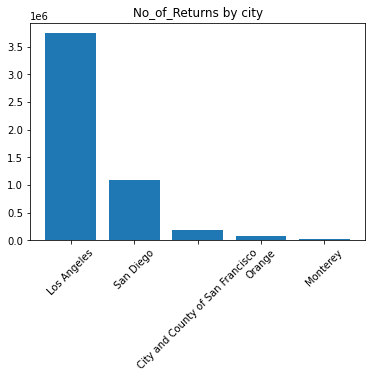

In [177]:
# Storing select query in sql variable.
sql = """SELECT sum(IRS_CA_df.No_of_Returns) as No_of_Returns, postal_code.City FROM IRS_CA_df JOIN postal_code ON IRS_CA_df.ZIPCODE = postal_code.code GROUP BY postal_code.City order by No_of_Returns desc limit 5"""
# reading sql query
data = pd.read_sql(sql, conn)
plt.xticks(rotation=45)
#x values: data.Country,  y values: data.sum_deaths
plt.bar(data.City, data.No_of_Returns)
plt.title("No_of_Returns by city")
plt.show()

#### The above bar graph shows that the Los Angeles is the city in California state where number of returns are maximum

### From above 2 bar graphs vaccination by Jurisdiction and Number of returns by city, it would be save to say that cities where persons are working and submitting the returns are doing good and the rate of taking vaccination is high compare to other cities with less number of returns.

## This proves the first assumption for our dataset as the state with more filed return has high vaccination rate.

## 3. Covid Cases vs Vaccination count in California State

### After looking at the returns filed and vaccination, it would be interesting to see how the covid cases decreasing with increase of vaccinication?

In [174]:
# Storing the query in sql variable.
sql = """SELECT sum(Covid19_cases.total_cases) as Covid_cases, sum((Covid_df.persons_fully_vaccinated * Covid_df.age12_plus_population)/100) as fully_vaccinated , Covid19_cases.county FROM Covid19_cases 
        JOIN Covid_df ON Covid19_cases.county = Covid_df.county GROUP BY Covid_df.county order by persons_fully_vaccinated desc limit 10"""
# Reaing the query result
data = pd.read_sql(sql, conn)

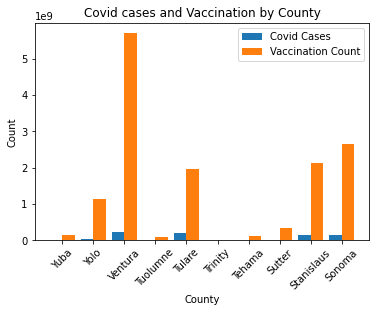

In [175]:
# Covid cases and vaccination by county.
X = data.county
cases = data.Covid_cases
Vaccine = data.fully_vaccinated
  
X_axis = np.arange(len(data.county))
  
plt.bar(X_axis - 0.2, cases, 0.4, label = 'Covid Cases')
plt.bar(X_axis + 0.2, Vaccine, 0.4, label = 'Vaccination Count')
  
plt.xticks(X_axis, X)
plt.xticks(rotation=45)
plt.xlabel("County")
plt.ylabel("Count")
plt.title("Covid cases and Vaccination by County")
plt.legend()
plt.show()

### Its is intersting to see that covid cases is decreasing with increase of vaccination. We can see most vaccination in county Venture.

## 4. Covid Deaths vs Vaccination count in California State

In [180]:
# Storing the query in sql variable.
sql = """SELECT sum(Covid19_cases.total_deaths) as Covid_deaths, sum((Covid_df.persons_fully_vaccinated * Covid_df.age12_plus_population)/100) as fully_vaccinated , Covid19_cases.county FROM Covid19_cases 
        JOIN Covid_df ON Covid19_cases.county = Covid_df.county GROUP BY Covid_df.county order by persons_fully_vaccinated desc limit 10"""
# Reading the query result.
data = pd.read_sql(sql, conn)


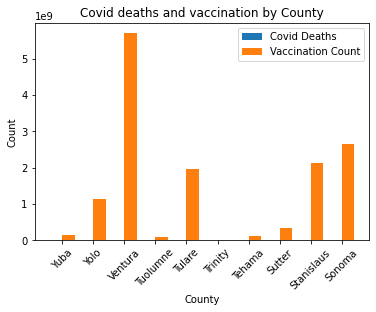

In [181]:
# Covid deaths and Vaccination count by county.
X = data.county
cases = data.Covid_deaths
Vaccine = data.fully_vaccinated
  
X_axis = np.arange(len(data.county))
  
plt.bar(X_axis - 0.2, cases, 0.4, label = 'Covid Deaths')
plt.bar(X_axis + 0.2, Vaccine, 0.4, label = 'Vaccination Count')
  
plt.xticks(X_axis, X)
plt.xticks(rotation=45)
plt.xlabel("County")
plt.ylabel("Count")
plt.title("Covid deaths and vaccination by County")
plt.legend()
plt.show()

### As we can see there is a drastic drop in covid deaths after increasing the vaccination in different counties of California state.

## 5. Covid Deaths by County in California State

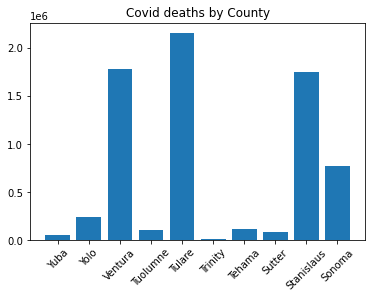

In [148]:
#x values: data.Country,  y values: data.sum_deaths
plt.bar(data.county, data.Covid_deaths)
plt.xticks(rotation=45)
plt.title("Covid deaths by County")
plt.show()

### As we can see from above graph that county 'Tulare' has maximum deaths in California state.

## 6. Maximum Covid Cases by county in California State - top 10

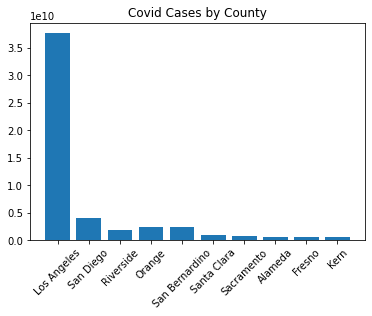

In [182]:
# Storing the query in sql variable
sql = """SELECT sum(Covid19_cases.total_cases) as Covid_cases, sum((Covid_df.persons_fully_vaccinated * Covid_df.age12_plus_population)/100) as fully_vaccinated , Covid19_cases.county FROM Covid19_cases 
        JOIN Covid_df ON Covid19_cases.county = Covid_df.county GROUP BY Covid_df.county order by total_cases desc limit 10"""
# Reading the query result.
data = pd.read_sql(sql, conn)
plt.xticks(rotation=45)
#x values: data.Country,  y values: data.sum_deaths
plt.bar(data.county, data.Covid_cases)
plt.title("Covid Cases by County")
plt.show()

### Los Angeles is the state with maximum covid cases by county in California State.

## 7. Minimum Covid Cases by county in California State - last 10

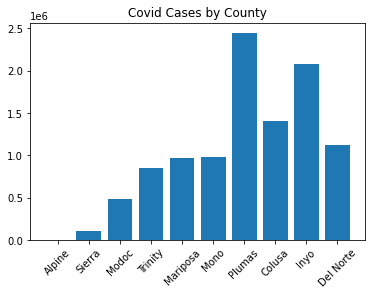

In [184]:
# Storing the query in sql variable.
sql = """SELECT sum(Covid19_cases.total_cases) as Covid_cases, sum((Covid_df.persons_fully_vaccinated * Covid_df.age12_plus_population)/100) as fully_vaccinated , Covid19_cases.county FROM Covid19_cases 
        JOIN Covid_df ON Covid19_cases.county = Covid_df.county GROUP BY Covid_df.county order by total_cases asc limit 10"""
# Reading the query result.
data = pd.read_sql(sql, conn)
plt.xticks(rotation=45)
#x values: data.Country,  y values: data.sum_deaths
plt.bar(data.county, data.Covid_cases)
plt.title("Covid Cases by County")
plt.show()

### Above we can see the last 10 counties with minimum covid cases in California state compare to the other counties.

# Summary of project

It’s been more then 2 years since we first heard about the coronavirus. Even with all the facilities available today we are not able to completely get rid of it and still it is a big news. As my term project I have analyzed the corelation between covid cases, vaccination, and number of returns filed in the state of california.

I started with vaccination count, and I found that Los Angeles is the Jurisdiction in CA state which has maximum vaccination compared to another jurisdiction. I studied the Number of returns filed to understand if it has any relation with covid vaccination and it is interesting to see that the Los Angeles jurisdiction which has maximum vaccination also has most return filed. So, we can say that working class are taking more vaccination.

In my next observation I found that with increase of covid vaccination, the number of covid cases decreases and Ventura County has more vaccination and less covid cases compare to other counties in CA state. I also analyzed covid deaths with vaccination count and realized that deaths in counties decreases with increase in number of vaccinations. Ventura county is again doing good and have less deaths with increase of vaccination in CA state.

Sadly 'Tulare' county has maximum deaths and 'Los Angeles' has maximum covid cases in CA state. The minimum covid cases is in Alpine, Serra, and Modoc county.
After looking at the data I think we can say that Vaccination is helping counties in decreasing the number of deaths and covid cases so all the counties should emphasize on increasing the vaccination and should encourage people to take all doses of vaccination.


For completing the project objective, I have performed following steps:

1) Look for data - I first looked for all the covid data sources which I wanted to use in my project. I did all the analysis on California state counties and jurisdiction so i particularly looked for covid cases, Vaccination, return filed data and postal codes data for the state of California.
2) Making connection or Reading data: Since I am using different data sources, I got data in CSV, API and HTML format. So, I read the csv's file and did connection for API and web data.
3) Cleaning and Formatting of the Data: Once I made the connection to all dataset, I started performing different data transformation to make data clean and easy to read. I have removed duplicates, null values, taken care of outliers, change columns name, filter data to show only California state information, change the format of the data, and others.
4) Creating SQLite Database: After all transformation I created SQLite database with individual tables of all selected data sources. 
5) Analyze the data: Once I have all the data in one place, I created the different visualization to get answers for all the questions which I have in mind while working on projects.


As part of ethical implication, I make sure I remained neutral and unbiased and my perceptions or opinion do not impact the different stages like data collection, cleaning and analyzing of project. I have not used any information which can cause any physical or emotional harm. Most of the data for project is coming from reputed government sites, I make sure I followed all the rules while scraping data from web and avoid using any personal information of people.

While my study suggests that higher vaccination rate reduces the number of people contracting covid, there are ethical implications to mandating covid vaccination. One should be mindful about an individual's fundamental right to make decisions about one's own body and that includes refusal to take any vaccine or medical treatment.
